Abhay Singh

Email: abhay.s-26@scds.saiuniversity.edu.in

School of Computing and Data Science

### Fine Tuning for model **InceptionResNetV2**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/DLPROJECT/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/DLPROJECT/X_test_std.npy')

y_train = load('/content/drive/MyDrive/DLPROJECT/y_train.npy')
y_test = load('/content/drive/MyDrive/DLPROJECT/y_test.npy')

In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (381, 299, 299, 3)
X_test_std_shape: (127, 299, 299, 3)


In [5]:
model1_FT = keras.models.load_model('/content/drive/MyDrive/DLPROJECT/01_InceptionResNetV2_TransferLearning_Best_Model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 494 variables whereas the saved optimizer has 986 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [6]:
model1_FT.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_203 (Conv2D)       │ (None, None, None, 32) │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, None, None, 32) │             96 │ conv2d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, None, None, 32) │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_204 (Conv2D)       │ (None, None, None, 32) │          9,216 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, None, None, 32) │             96 │ conv2d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, None, None, 32) │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_205 (Conv2D)       │ (None, None, None, 64) │         18,432 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, None, None, 64) │            192 │ conv2d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, None, None, 64) │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, None, None, 64) │              0 │ activation_205[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_206 (Conv2D)       │ (None, None, None, 80) │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_206   │ (None, None, None, 80) │            240 │ conv2d_206[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_206            │ (None, None, None, 80) │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_207 (Conv2D)  

 Total params: 108,634,442 (414.41 MB)

 Trainable params: 54,285,412 (207.08 MB)

 Non-trainable params: 63,616 (248.50 KB)

 Optimizer params: 54,285,414 (207.08 MB)

In [7]:
print(len(model1_FT.layers))
print(int(0.25*(len(model1_FT.layers))))

784
196


In [8]:
for layer in model1_FT.layers[:int(0.25*(len(model1_FT.layers)))]:
  layer.trainable = False

for layer in model1_FT.layers[int(0.25*(len(model1_FT.layers))):]:
  layer.trainable = True

In [9]:
model1_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
             keras.callbacks.ModelCheckpoint("bestFT.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model1_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.10, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 791s 31s/step - accuracy: 0.8302 - loss: 1.0834 - val_accuracy: 0.3333 - val_loss: 12770.4150
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 706s 29s/step - accuracy: 0.8639 - loss: 0.4402 - val_accuracy: 0.1795 - val_loss: 185.3277
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 699s 30s/step - accuracy: 0.9162 - loss: 0.3402 - val_accuracy: 0.6410 - val_loss: 0.9667
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 665s 30s/step - accuracy: 0.9040 - loss: 0.2349 - val_accuracy: 0.5641 - val_loss: 564.7798
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 664s 30s/step - accuracy: 0.9728 - loss: 0.1586 - val_accuracy: 0.4615 - val_loss: 5042.0513
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 658s 29s/step - accuracy: 0.9606 - loss: 0.1158 - val_accuracy: 0.5128 - val_loss: 0.9618
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 714s 31s/step - accuracy: 0.9829 - loss: 0.0610 - val_accuracy: 0.7692 - val_loss: 0.6547
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 676s 30s/step - accuracy: 0.9630 - loss: 0.2243 - val_a

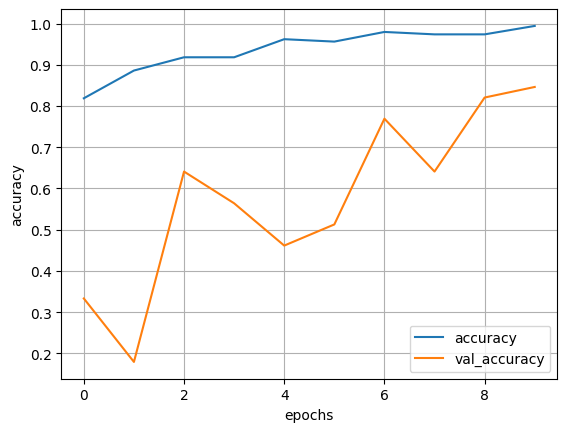

In [10]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [11]:
testLoss_FineTune, testAccuracy_FineTune = model1_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 ━━━━━━━━━━━━━━━━━━━━ 78s 19s/step - accuracy: 0.7190 - loss: 0.8304
Test-loss: 0.823912, Test-accuracy: 0.732283


In [12]:
model1_FT.load_weights("bestFT.weights.h5")

testLoss_FineTune, testAccuracy_FineTune = model1_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 ━━━━━━━━━━━━━━━━━━━━ 80s 20s/step - accuracy: 0.7190 - loss: 0.8304
Test-loss: 0.823912, Test-accuracy: 0.732283


In [13]:
y_proba = model1_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

4/4 ━━━━━━━━━━━━━━━━━━━━ 94s 22s/step
[3 3 0 0 2 1 3 3 1 1 3 0 1 3 1 2 3 2 0 1 1 1 0 3 0 0 3 1 1 1 1 3 3 3 1 1 1
 3 3 2 2 2 1 3 3 0 2 0 1 0 1 2 3 3 1 1 3 0 1 1 3 2 0 0 0 0 1 1 0 1 0 3 3 3
 3 3 0 3 1 3 2 1 3 2 3 3 3 3 1 3 0 1 0 1 2 0 3 0 3 3 0 3 1 1 3 2 3 1 1 0 2
 0 3 0 3 1 0 3 3 3 1 3 3 3 3 3 3]


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[16,  4,  0,  6],
       [ 7, 23,  0,  3],
       [ 2,  4, 14,  1],
       [ 2,  5,  0, 40]])

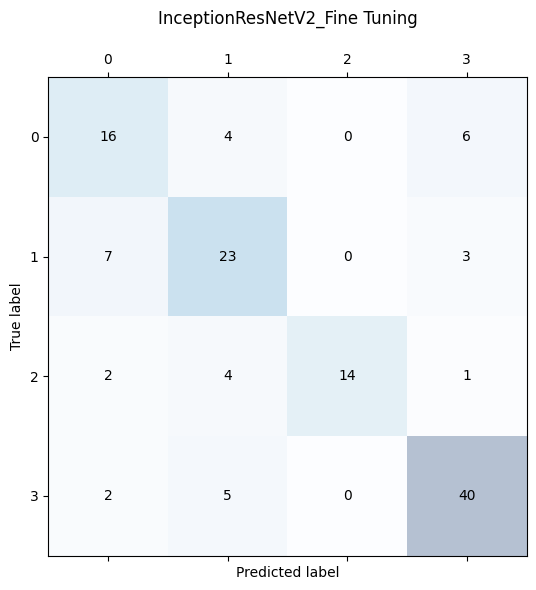

In [15]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('InceptionResNetV2_Fine Tuning\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.7487459900845728
Recall:  0.7322834645669292
F1-score:  0.7343385811455536






In [17]:
model1_FT.save('/content/drive/MyDrive/DLPROJECT/FT_InceptionResNetV2_Best_Model.keras')